In [3]:
import glob
import json

root = '/home/tf63/project/nerf/ngp_lab/data/diffusion_fix/03001627'
model_dirs = glob.glob(f'{root}/*')
with open(f'{model_dirs[0]}/img/transforms.json') as f:
    t = json.load(f)

t['frames'][0]['elevation']


-80

In [17]:
import random

random.randint(0, 1)

1

In [5]:
from utils import make_gif

make_gif('', '/home/tfukuda/project/nerf/diffusion_lab/results/test/regenerate_mask_t-cfg5_0to1', 'b', wildcard='img90_run1_t???_list.png', duration=100)


In [2]:
import torch

a = torch.tensor([2, 1])
b = torch.tensor([3, 3])

a / b

tensor([0.6667, 0.3333])

In [6]:
a = torch.arange(10)
b = torch.arange(10, 20)
a[a < 5] = b[a < 5]

a

tensor([10, 11, 12, 13, 14,  5,  6,  7,  8,  9])

/home/tf63/project/nerf/ngp_lab/data/diffusion_fix/03001627/19d7db03d81663394733824eae5cd9ae/img/011.png
/home/tf63/project/nerf/ngp_lab/data/diffusion_fix/03001627/19d7db03d81663394733824eae5cd9ae/img/014.png
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])


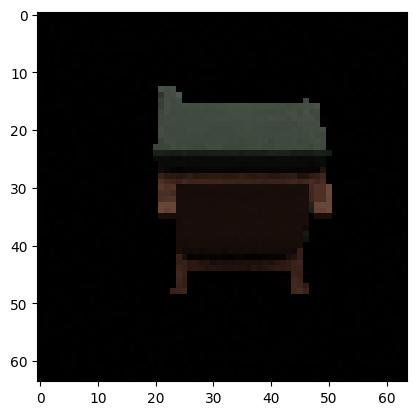

In [133]:
from torchvision.io import read_image
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_tensor

model_dir = model_dirs[7]
G = [[7, 4], [4, 5], [5, 6], [6, 7],
     [8, 9], [9, 10], [10, 11], [11, 8],
     [15, 12], [12, 13], [13, 14], [14, 15],
     [16, 17], [17, 18], [18, 19], [19, 16],
     [17, 19], [16, 18], [17, 19], [18, 16],
     [16, 17], [17, 18], [18, 19], [19, 16],
     [23, 20], [20, 21], [21, 22], [22, 23],
     [24, 25], [25, 26], [26, 27], [27, 24],
     [31, 28], [28, 29], [29, 30], [30, 31],
     ]

# i_view = random.randint(0, 35)
i_view = 11
x1_path = f'{model_dir}/img/{i_view:03d}.png'
x2_path = f'{model_dir}/img/{G[i_view][random.randint(0, 1)]:03d}.png'

print(x1_path)
print(x2_path)

x1 = read_image(path=x1_path)[:3, :, :]
x2 = read_image(path=x2_path)[:3, :, :]
# x1 = to_tensor(Image.open(x1_path))
# x2 = to_tensor(Image.open(x2_path))


print(x1.shape)
print(x2.shape)
plt.imshow(x1.permute(1, 2, 0))

In [5]:
import torch

ele_dict = {-80: 0, -60: 1, -40: 2, -20: 3, 0: 4, 20: 5, 40: 6, 60: 7, 80: 8}
x = torch.tensor([80, -40, 20, 0, -20, -80, -40])
x.apply_(lambda x: ele_dict[x])

x


tensor([8, 2, 5, 4, 3, 0, 2])

In [9]:
x = torch.tensor([[1, 2, 3]])

torch.cat([x, x, x], dim=0)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [13]:
t = torch.zeros(3, 3, 3)
torch.flatten(t).shape

torch.Size([27])

In [11]:
epsilon = torch.randn_like(x, dtype=torch.float)

In [18]:
a = torch.zeros((1, 100))

a.repeat(5, 1).shape

torch.Size([5, 100])

In [21]:
a = torch.tensor([0])

a.repeat(5)

tensor([0, 0, 0, 0, 0])

In [1]:
from torchvision.io import read_image
x1_path = '/home/tf63/project/pytorch-dev/tutorial/Diffusion-Models-pytorch_simple/cifar10_64/cifar10-64/train/class3/img9.png'
# x1 = read_image(path=x1_path)[:3, :, :]


torch.Size([3, 64, 64])
tensor([0.2157, 0.2471, 0.2353], dtype=torch.float64)
tensor([0.2157, 0.2471, 0.2353, 1.0000])


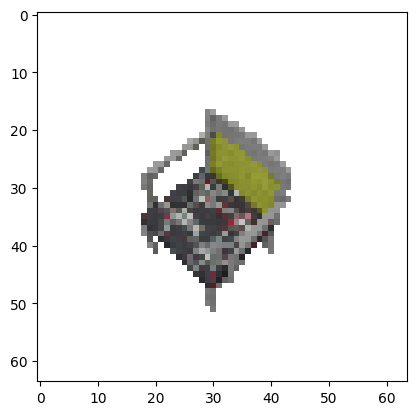

In [38]:
from PIL import Image, ImageFilter
import torchvision
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torch

x1_path = '/home/tfukuda/project/nerf/diffusion_lab/data/diffusion_fix/03001627/1a6f615e8b1b5ae4dbbc9440457e303e/img/028.png'
im = Image.open(x1_path)
# transforms = torchvision.transforms.Compose([
#     torchvision.transforms.ToTensor(),
#     torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

# a = transforms(im)

# plt.imshow(a.permute(1, 2, 0))

im_cv2 = cv2.imread(x1_path, -1) / 255
index = np.where(im_cv2[:, :, 3] == 0)
# 白塗りする
im_cv2[index] = [1., 1., 1., 1.]
im_cv2 = im_cv2[:, :, [2, 1, 0]]
# im_cv2 = im_cv2.transpose(2, 0, 1)

transforms = torchvision.transforms.ToTensor()

im_cv2 = transforms(im_cv2)
# im_cv2_tensor = torch.tensor(im_cv2)
print(im_cv2.shape)
plt.imshow(im_cv2.permute(1, 2, 0))
print(im_cv2[:, 30, 30])

im = transforms(im)
print(im[:, 30, 30])

In [2]:
run_name = "test_epoch_100_view_20_pil"
epochs = 100
batch_size = 13
n_sample = 10

img_size = 64
root_dir = '/home/tfukuda/project/nerf/diffusion_lab/data/diffusion_fix/03001627/'
views = 20

device = "cuda"
lr = 3e-4


In [8]:
from utils import ShapeNetDataset
import torch
from torch.utils.data import DataLoader

import torchvision

def get_data(root_dir, views, batch_size):
    transforms = torchvision.transforms.Compose([
        # torchvision.transforms.Resize(80),  # img_size + 1/4 *img_size
        # torchvision.transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    dataset = ShapeNetDataset(root=root_dir, transforms=transforms, views=views)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader


In [12]:
from ddpm_conditional import Diffusion
from modules import UNet_conditional
import os
import copy

device = device
diffusion = Diffusion(img_size=img_size, device=device)
dataloader = get_data(root_dir=root_dir, views=views, batch_size=batch_size)
model = UNet_conditional(img_size=img_size).to(device)

epoch_ini = 95

model_dict = torch.load(os.path.join("models", run_name, f"{epoch_ini}_ckpt.pt"))
model.load_state_dict(model_dict)

ema_model_dict = torch.load(os.path.join("models", run_name, f"{epoch_ini}_ema_ckpt.pt"))

ema_model = copy.deepcopy(model).eval().requires_grad_(False)
ema_model.load_state_dict(ema_model_dict)

<All keys matched successfully>

In [13]:
from utils import save_images

tmp = dataloader.__iter__()
_, val_x2, val_x1_rot, val_x1_ele, val_x2_rot, val_x2_ele = tmp.next()
val_x2 = val_x2[0].to(device)
val_x1_rot = val_x1_rot[0].to(device)
val_x1_ele = val_x1_ele[0].to(device)
val_x2_rot = val_x2_rot[0].to(device)
val_x2_ele = val_x2_ele[0].to(device)

sampled_images = diffusion.sample(model, n=n_sample, x2=val_x2, x1_rot=val_x1_rot, x1_ele=val_x1_ele, x2_rot=val_x2_rot, x2_ele=val_x2_ele, cfg_scale=0)
ema_sampled_images = diffusion.sample(ema_model, n=n_sample, x2=val_x2, x1_rot=val_x1_rot, x1_ele=val_x1_ele, x2_rot=val_x2_rot, x2_ele=val_x2_ele, cfg_scale=0)
# plot_images(sampled_images)
save_images(sampled_images, os.path.join("sampling", run_name, f"sample.jpg"))
save_images(ema_sampled_images, os.path.join("sampling", run_name, f"sample_ema.jpg"))


12:18:16 - INFO: Sampling 10 new images....
0it [00:00, ?it/s]/home/tfukuda/project/nerf/venv/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
999it [00:58, 16.93it/s]
12:19:15 - INFO: Sampling 10 new images....
999it [00:59, 16.91it/s]


In [41]:
a = torch.tensor([1, 2, 3], device='cuda:0')
b = torch.tensor([1, 2], device=a.device)
print(b.device)

cuda:0


In [50]:
import glob
root_dir = '/home/tfukuda/project/nerf/diffusion_lab/data/diffusion_fix/03001627'

model_dirs = glob.glob(f'{root_dir}/*')
print(len(model_dirs))
for model_dir in model_dirs:
    imgs = glob.glob(f'{model_dir}/img/*')
    if len(imgs) != 37:
        print("----------------------------------------------------------------")
        print(model_dir)
    # print(model_dir)
    # print(len(imgs))

6000
